# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

#Data Structure
To check how the data looks like, try the head method to see the sample.

In [7]:
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import scipy.stats as stats
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


#1. Is the distribution of body temperatures normal?

In [26]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


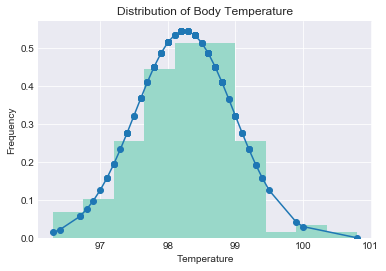

In [11]:
sns.set
%matplotlib inline
import scipy.stats as st
import numpy as np
df_sorted = sorted(df['temperature'])
fit = stats.norm.pdf(df_sorted, np.mean(df_sorted), np.std(df_sorted))  #this is a fitting indeed
pl.plot(df_sorted,fit,'-o')
pl.hist(df_sorted,normed=True,color='#99d8c9')      #use this to draw histogram of your data
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of Body Temperature')
pl.show() 



The distribution in the given data is slightly skewed towards the right but does look like a normal distribution curve.

#2.Is the sample size large? Are the observations independent?
So in the given sample there are 65 male and 65 female readings. The sample does have more than 30 records each for both the genders. Hence we can conclude that the sample size is large. 

In [21]:
sample = len(df)
types = len(list(df.columns))
print('Total number of samples - ', sample)
print('Total number of types - ',  types)
print(list(df.columns))

Total number of samples -  130
Total number of types -  3
['temperature', 'gender', 'heart_rate']


In [27]:
df["gender"].value_counts()

M    65
F    65
Name: gender, dtype: int64

The sample sets contains equal number of male and female observations and each of them are tied to a certain individual and are independent from each other. This is a classic example of Poisson process.

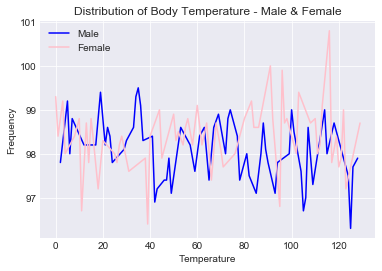

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
male = df.loc[df['gender'] == 'M']
female = df.loc[df['gender'] == 'F']
plt.plot(male['temperature'],color='blue',label='Male')
plt.plot(female['temperature'],color='pink',label='Female')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of Body Temperature - Male & Female')
plt.legend()
plt.show()


#3.Is the true population mean really 98.6 degrees F?

### Would you use a one-sample or two-sample test? Why?
I think it's better to use a one-sample test because we are trying to compare a small group mean to the accepted population mean. 
### In this situation, is it appropriate to use the  tt  or  zz  statistic?
We should use the t statistic since the population's standard deviation is unknown.


In [37]:
mean_temp = df['temperature'].mean()
print('Mean temperature of the sample is: {:.2f}'.format(mean_temp))

Mean temperature of the sample is: 98.25


We need to compare the sample mean to the population mean of 98.6.


In [38]:
one_sample = st.ttest_1samp(df['temperature'], popmean=98.6)
print('The t-statistic is %.3f and the p-value is %.10f.' % one_sample)

The t-statistic is -5.455 and the p-value is 0.0000002411.


It is unlikely that we would get a sample mean of 98.25. So we can reject this null hypothesis. We can further check the work by constructing a 95% confidence interval:

###Now try using the other test. How is the result be different? Why?

In [39]:
bottom, top = st.t.interval(0.95, len(df['temperature'])-1, 
                             loc=np.mean(df['temperature']), 
                             scale=st.sem(df['temperature']))

print('The 95% confidence interval is ({:.2f}, {:.2f}).'.format(bottom,top))

The 95% confidence interval is (98.12, 98.38).


So the 95% confidence interval is (98.12, 98.38).
Both of these examples above show us that it is very unlikely that the true population mean is 98.6 degrees F.

#4.Draw a small sample of size 10 from the data and repeat both tests

###Which one is the correct one to use?

In [62]:
#resample with same set but picking 10 temperature randomly
df_resample = np.random.choice(df['temperature'],size=10)
#recalculating the mean with new mean
mean_temp = np.mean(df_resample)
print('Mean temperature of the sample is: {:.2f}'.format(mean_temp))
one_sample = st.ttest_1samp(df_resample, popmean=98.6)
print('The t-statistic is %.3f and the p-value is %.10f.' % one_sample)
bottom, top = st.t.interval(0.95, len(df_resample)-1, 
                             loc=np.mean(df_resample), 
                             scale=st.sem(df_resample))

print('The 95% confidence interval is ({:.2f}, {:.2f}).'.format(bottom,top))

Mean temperature of the sample is: 98.36
The t-statistic is -1.798 and the p-value is 0.1057658973.
The 95% confidence interval is (98.06, 98.66).


###What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

The mean temperature is now changed to 98.36 compared to 98.25 from old sample. The t-st

|Calculation|OLD Sample|NEW Sample|
|------|------|------|
|Mean|98.25|98.36|
|t-stat|-5.455|-1.798|
|p-value|0.0000002411|0.1057658973|
|95% confidence|(98.12, 98.38)|(98.06, 98.66)|


We can conclude that as per the new sample that it is likely that the true populateion mean is 98.6 degrees F.This contradicts the results we got earlier. 


#5.At what temperature should we consider someone's temperature to be "abnormal"?
###Start by computing the margin of error and confidence interval.

Considering the impacts of making a Type I error versus a Type II error, it seems that alpha = 0.05 is an acceptable balance between the two. We don't want to create such a high threshold for a confidence interval such that we reject the null when it is true and risk getting other people sick while we also do not want to make the mistake that people are sick when they are healthy. The risk of getting others sick is slightly worse. Given the confidence interval above of (98.12, 98.38), these temperatures could be used as a threshold for an "abnormal" temperature, but, depending on outside circumstances, these temperatures may not indicate sickness - just abnormality.

#6 Is there a significant difference between males and females in normal temperature?

In [46]:
male = df[df['gender'] == 'M']
female = df[df['gender'] == 'F']
male_mean = male['temperature'].mean()
female_mean = female['temperature'].mean()
print('Total number of male: ',len(male)) 
print('Mean for male: ',male_mean) 
print('Total number of female: ',len(female)) 
print('Mean for female: ',female_mean) 

Total number of male:  65
Mean for male:  98.1046153846154
Total number of female:  65
Mean for female:  98.39384615384613


The mean seems to be different for male and female. 

In [49]:
two_sample = st.ttest_ind(male['temperature'], female['temperature'])
print('The t-statistic is %.3f and the p-value is %.3f.' % two_sample)


The t-statistic is -2.285 and the p-value is 0.024.


###What test did you use and why?
A two-sample t-test is more suitable than a one-sample t-test as used above. 

###Write a story with your conclusion in the context of the original problem.
Based on the samples in the study,there is 99% confidence that the mean normal temperature of human body is between 98.12 and 98.38 F. The study also found with 95% confidence that the mean female temperature is greater than the mean male temperature.

The difference between the two mean temperatures is fairly neglibigle and so, while there is statistical significance, there does not seem to be a practical need to conclude and publish different mean temperatures for different genders.
